## Project proposal
### Importing the dataset

In [6]:
install.packages("cowplot")
install.packages("kknn")
install.packages("GGally")
install.packages('tidyverse')
library(kknn)
library(GGally)


The downloaded binary packages are in
	/var/folders/fb/5nf2l6vx4tj8839ndlppjshw0000gn/T//RtmpqNZGFj/downloaded_packages

The downloaded binary packages are in
	/var/folders/fb/5nf2l6vx4tj8839ndlppjshw0000gn/T//RtmpqNZGFj/downloaded_packages

The downloaded binary packages are in
	/var/folders/fb/5nf2l6vx4tj8839ndlppjshw0000gn/T//RtmpqNZGFj/downloaded_packages

The downloaded binary packages are in
	/var/folders/fb/5nf2l6vx4tj8839ndlppjshw0000gn/T//RtmpqNZGFj/downloaded_packages


Warning message:
“package ‘tidymodel’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”


In [7]:
#import libraries
install.packages("themis")
library(tidyverse)
library(repr)
options(repr.matrix.max.rows = 16)
library(readxl)
library(ggplot2)
library(cowplot)


The downloaded binary packages are in
	/var/folders/fb/5nf2l6vx4tj8839ndlppjshw0000gn/T//RtmpqNZGFj/downloaded_packages



Attaching package: ‘cowplot’


The following object is masked from ‘package:lubridate’:

    stamp




## Dataset background
- The dataset information can be found at: https://archive.ics.uci.edu/dataset/320/student+performance
## Possible questions from the dataset
- Proportion of students getting high to very high freetime after school in urban area in comparison of proportion of students getting high to very high freetime after school in rural area
- Mean final grade of students receiving extra support from school and family in comparison to students getting no support from school and family
- The mean number of absences for students in urban area in comparison to students in rural area. 
- Mean number of past class failures for students with family support in comparison to students with no family support. 
- mean final grade of students with a romantic relationship in comparison to the mean final grade of students with no romantic relationship.

## Final question for the dataset:
- With this dataset, we would like to explore: Proportion of students getting high to very high freetime after school in urban area in comparison of proportion of students getting high to very high freetime after school in rural area
- With this dataset, one location parameter that we will use is proportion of students getting high to very high free time after school. Another scale parameter is the standard deviation to see if the difference between two groups are by chance or not

## Import dataset

In [8]:
studenturl<- "https://archive.ics.uci.edu/static/public/320/student+performance.zip"
temp <- tempfile()
download.file(studenturl,temp)
studentzip <- unzip(temp, "student.zip")
studentfile <- unzip(studentzip,"student-por.csv")
student <- read_csv2(studentfile, col_names = TRUE)

student

ℹ Using "','" as decimal and "'.'" as grouping mark. Use `read_delim()` for more control.

Rows: 649 Columns: 33
── Column specification ────────────────────────────────────────────────────────
Delimiter: ";"
chr (17): school, sex, address, famsize, Pstatus, Mjob, Fjob, reason, guardi...
dbl (16): age, Medu, Fedu, traveltime, studytime, failures, famrel, freetime...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,⋯,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
GP,F,18,U,GT3,A,4,4,at_home,teacher,⋯,4,3,4,1,1,3,4,0,11,11
GP,F,17,U,GT3,T,1,1,at_home,other,⋯,5,3,3,1,1,3,2,9,11,11
GP,F,15,U,LE3,T,1,1,at_home,other,⋯,4,3,2,2,3,3,6,12,13,12
GP,F,15,U,GT3,T,4,2,health,services,⋯,3,2,2,1,1,5,0,14,14,14
GP,F,16,U,GT3,T,3,3,other,other,⋯,4,3,2,1,2,5,0,11,13,13
GP,M,16,U,LE3,T,4,3,services,other,⋯,5,4,2,1,2,5,6,12,12,13
GP,M,16,U,LE3,T,2,2,other,other,⋯,4,4,4,1,1,3,0,13,12,13
GP,F,17,U,GT3,A,4,4,other,teacher,⋯,4,1,4,1,1,1,2,10,13,13
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮


## Clean and wrangle dataset
- For this dataset, we will select the variable of interest, along with filtering out any data that is invalid (i.e NA)
- After that we will filter out the freetime after school information to be 3 and above (indicating high to very high free time)

In [30]:
select_student <- student %>%
                  select(address, freetime)%>%
                  filter(!is.na(address) & !is.na(freetime))

highfree_student <- select_student %>%
                    filter(freetime > 3)

n_ruralstudent <- select_student %>%
                  filter(address == "R")%>%
                  summarize(n_rural = n())
n_urbanstudent <- select_student %>%
                  filter(address == "U")%>%
                  summarize(n_urban = n())
prop_rural <- highfree_student %>%
              filter(address == "R") %>%
              summarize(prop_rural = n()/pull(n_ruralstudent, n_rural))
prop_urban <- highfree_student %>%
              filter(address == "U") %>%
              summarize(prop_urban = n()/pull(n_urbanstudent, n_urban))
student_summary <- tibble(n_ruralstudent,n_urbanstudent,prop_rural,prop_urban)
student_summary

n_rural,n_urban,prop_rural,prop_urban
<int>,<int>,<dbl>,<dbl>
197,452,0.4060914,0.3672566


## Plot the raw data
- We will plot the students freetime according to their address in a bargraph to see the proportion of students freetime in both category

In [39]:
mutate_student <- select_student %>%
                  mutate(freetime = freetime > 3) 
student_summary <- mutate_student %>%
                   group_by(address, freetime)%>%
                   summarize(count = n())
student_summary

`summarise()` has grouped output by 'address'. You can override using the
`.groups` argument.


address,freetime,count
<chr>,<lgl>,<int>
R,FALSE,117
R,TRUE,80
U,FALSE,286
U,TRUE,166


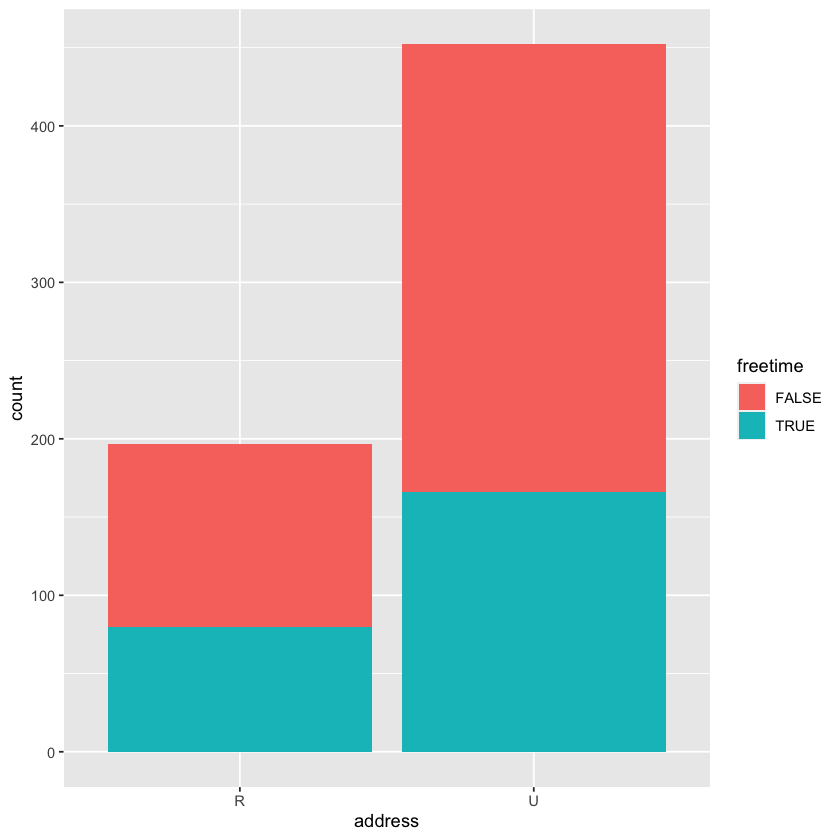

In [41]:
bargraph <- student_summary %>%
            ggplot(aes(x=address,y=count,fill=freetime))+
            geom_bar(stat="identity")
bargraph